In [1]:
from algorithms.BoruvkasAlgorithm import BoruvkasAlgorithm
from algorithms.Graph import Graph
from algorithms.BoruvkasAlgorithmSingleMachine import BoruvkasAlgorithmSingleMachine
from utils.GraphUtils import generate_graph, generate_plot_for_graph, plot_graph
import matplotlib.pyplot as plt

import pandas as pd
df = pd.read_csv("datasets/mcdonalds.csv",encoding='latin1', names=["lat", "long", "type", "location"])

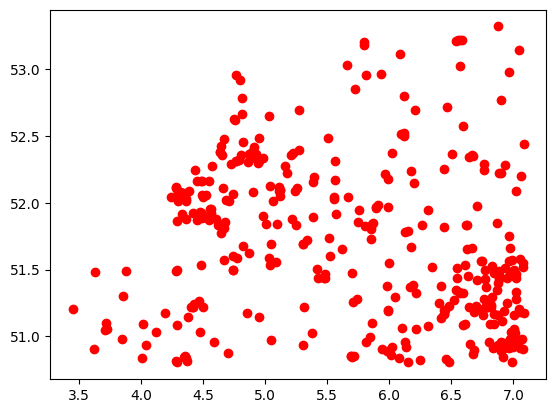

In [2]:
import math
import random

x = df[["lat"]].values
y = df[["lat"]].values
points = df[["lat", "long"]].values

# value 1: x bottom-left,
# value 2: y bottom-left,
# value 3: x top-right,
# value 4: y top-right
netherlandsRect = (3.31497114423, 50.803721015, 7.09205325687, 53.5104033474)
netherlandsRectAlt = (3.273926, 50.680777, 7.316895, 53.572979)

def applyTransformations(points):
    for point in points:
        point[1] *= 2000
        point[0] += random.randint(-1, 1)


def rectContains(rect, pt):
    logic = rect[0] <= pt[0] and rect[1] <= pt[1] and rect[2] >= pt[0] and rect[3] >= pt[1]
    return logic

def filterPoints(points):
    newPoints = []

    for point in points:
        if rectContains(netherlandsRect, point):
            newPoints.append(point)

    return newPoints

points = filterPoints(points)
#applyTransformations(points)

def weightCalculation(p1, p2):
    return int(math.sqrt((p1[0] * 10**5 - p2[0] * 10**5)**2 + (p1[1] * 10**5 - p2[1] * 10**5)**2))

Gmacs = generate_graph(points, weightCalculation)

generate_plot_for_graph(Gmacs)

In [3]:
max_iterations = 10
alg = BoruvkasAlgorithm(Gmacs, max_iterations)
L, Vs, Es = alg.run()

running boruvkas algorithm: max_iterations = 10
Graph:
round 1
neighborhoods: ['(0, {0, 25}) ', '(4, {1, 2, 3, 4, 5, 33, 11, 16, 31}) ', '(6, {6, 7}) ', '(9, {32, 8, 9, 10}) ', '(12, {12, 13, 14, 18, 20, 30}) ', '(15, {21, 26, 15}) ', '(17, {17, 28}) ', '(19, {19, 22, 27}) ', '(23, {23, 24, 29}) ', '(34, {34, 153, 105}) ', '(65, {65, 35, 134, 137, 141, 142}) ', '(39, {36, 39, 95}) ', '(37, {37, 38, 166, 44, 45, 46, 122}) ', '(292, {292, 40, 335}) ', '(41, {104, 41, 42, 43}) ', '(159, {128, 129, 165, 47, 48, 143, 54, 55, 159}) ', '(49, {49, 109}) ', '(50, {50, 139}) ', '(148, {160, 51, 148, 169}) ', '(52, {52, 53}) ', '(56, {56, 96}) ', '(57, {58, 167, 57, 138}) ', '(140, {60, 151, 59, 140, 110, 63}) ', '(62, {97, 61, 62}) ', '(92, {64, 150, 152, 92}) ', '(67, {66, 67, 146, 91}) ', '(68, {68, 102, 103}) ', '(69, {69, 71}) ', '(72, {112, 70, 72, 73, 93}) ', '(74, {74, 75}) ', '(78, {108, 77, 78, 76}) ', '(79, {79, 80, 121, 157, 158}) ', '(87, {81, 87, 126}) ', '(125, {162, 82, 85, 125}) 

[ 4.60733 51.87476]


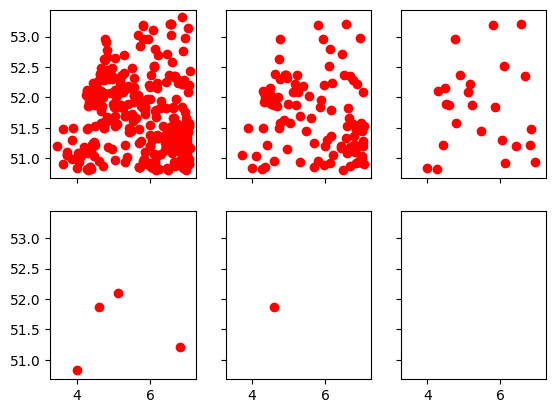

In [4]:
n = len(Vs)
fig, axarr = plt.subplots(2, 3, sharex='all', sharey='all')
for ax, i in zip(axarr.ravel(), range(len(axarr) + 3)):
    V = Vs[i]
    E = Es[i]
    plot_graph(V, E, points, ax)

    if (len(V) == 1):
        print(points[list(V.keys())[0]])
